In [1]:
import pandasql as psql

In [2]:
##  Birth Data Set 
birth = psql.load_births()
birth.head()

,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


In [3]:
##  Meat Data Set 
meat = psql.load_meat()
meat.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.



In [19]:
toydf = pd.read_csv('toy_dataset.csv',header=0)

In [20]:
toydf.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [21]:
toydf.City.unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [22]:
toydf.Age.describe()

count    150000.000000
mean         44.950200
std          11.572486
min          25.000000
25%          35.000000
50%          45.000000
75%          55.000000
max          65.000000
Name: Age, dtype: float64

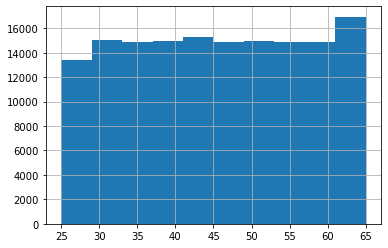

In [23]:
#plot histogram of Age column

toydf.Age.hist()

In [24]:
toydf.Income.describe()

count    150000.000000
mean      91252.798273
std       24989.500948
min        -654.000000
25%       80867.750000
50%       93655.000000
75%      104519.000000
max      177157.000000
Name: Income, dtype: float64

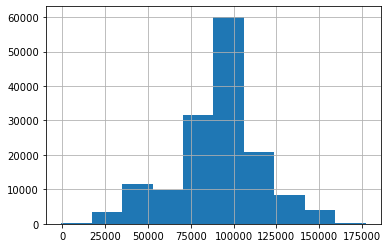

In [25]:
#plot histogram of Income column

toydf.Income.hist()

In [26]:
toydf.Illness.unique()

array(['No', 'Yes'], dtype=object)

In [27]:
sdf =  psql.sqldf("""
                    SELECT Age, Income 
                    From toydf
                  """)
sdf.head()

,Age,Income
0,41,40367.0
1,54,45084.0
2,42,52483.0
3,40,40941.0
4,46,50289.0


In [28]:
sdf = psql.sqldf("""
                SELECT Age, Income 
                FROM toydf
                """)
sdf.head()

,Age,Income
0,41,40367.0
1,54,45084.0
2,42,52483.0
3,40,40941.0
4,46,50289.0


In [29]:
sdf = psql.sqldf("""
                SELECT Age, Income, City 
                FROM toydf
                """)
sdf.head()

,Age,Income,City
0,41,40367.0,Dallas
1,54,45084.0,Dallas
2,42,52483.0,Dallas
3,40,40941.0,Dallas
4,46,50289.0,Dallas


In [30]:
sdf = psql.sqldf("""
                SELECT * 
                FROM toydf 
                WHERE City = 'Dallas'
                """)
sdf.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [31]:
sdf = psql.sqldf("""
                SELECT Age, avg(Income) AS avg_income 
                FROM toydf 
                GROUP BY Age
                """)
sdf.head()

,Age,avg_income
0,25,91164.566381
1,26,90883.180449
2,27,91554.379683
3,28,91829.497367
4,29,90913.652562


In [38]:
df_data_pool = psql.sqldf("""
                        SELECT * 
                        FROM toydf
                        """)
df_data_pool.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [41]:
df_data_pool_2 = psql.sqldf("""
                            SELECT toydf.*, average_income_data.avg_income
                            FROM toydf 
                            LEFT JOIN (
                            SELECT Age, avg(Income) AS avg_income 
                            FROM toydf 
                            GROUP BY Age
                            ) AS average_income_data 
                            ON toydf.Age = average_income_data.Age
                            """)
df_data_pool_2.head()

,Number,City,Gender,Age,Income,Illness,avg_income
0,1,Dallas,Male,41,40367.0,No,90481.772916
1,2,Dallas,Male,54,45084.0,No,91892.167014
2,3,Dallas,Male,42,52483.0,No,90897.550266
3,4,Dallas,Male,40,40941.0,No,91431.076738
4,5,Dallas,Male,46,50289.0,No,91672.584030


In [37]:
#adding delta_income (income - avg_income per age)

df_data_pool_2 = psql.sqldf("""
                            SELECT toydf.*, average_income_data.avg_income, (toydf.Income - average_income_data.avg_income) AS delta_income 
                            FROM toydf 
                            LEFT JOIN (
                            SELECT Age, avg(Income) AS avg_income 
                            FROM toydf 
                            GROUP BY Age
                            ) AS average_income_data 
                            ON toydf.Age = average_income_data.Age""")
df_data_pool_2.head()

,Number,City,Gender,Age,Income,Illness,avg_income,delta_income
0,1,Dallas,Male,41,40367.0,No,90481.772916,-50114.772916
1,2,Dallas,Male,54,45084.0,No,91892.167014,-46808.167014
2,3,Dallas,Male,42,52483.0,No,90897.550266,-38414.550266
3,4,Dallas,Male,40,40941.0,No,91431.076738,-50490.076738
4,5,Dallas,Male,46,50289.0,No,91672.584030,-41383.584030


In [74]:
#adding is_income_below_avg

df_data_pool_2 = psql.sqldf("""
                            SELECT toydf.*, average_income_data.avg_income,
                            (toydf.Income - average_income_data.avg_income) AS delta_income, 
                            CASE WHEN (toydf.Income - average_income_data.avg_income)  < 0 THEN 1 
                            ELSE 0 
                            END 
                            AS is_income_below_avg 
                            FROM toydf 
                            LEFT JOIN (
                            SELECT Age, avg(Income) AS avg_income 
                            FROM toydf 
                            GROUP BY Age
                            ) AS average_income_data 
                            ON toydf.Age = average_income_data.Age
                            """)
df_data_pool_2.head()

,Number,City,Gender,Age,Income,Illness,avg_income,delta_income,is_income_below_avg
0,1,Dallas,Male,41,40367.0,No,90481.772916,-50114.772916,1
1,2,Dallas,Male,54,45084.0,No,91892.167014,-46808.167014,1
2,3,Dallas,Male,42,52483.0,No,90897.550266,-38414.550266,1
3,4,Dallas,Male,40,40941.0,No,91431.076738,-50490.076738,1
4,5,Dallas,Male,46,50289.0,No,91672.584030,-41383.584030,1


In [75]:
#summary of whether or not income below avg per Age

df_data_pool_2 = psql.sqldf("""
                            SELECT Age, is_income_below_avg, count(distinct Number) AS count_people 
                            FROM (SELECT toydf.*, average_income_data.avg_income, 
                            (toydf.Income - average_income_data.avg_income) AS delta_income, 
                            CASE WHEN (toydf.Income - average_income_data.avg_income)  < 0 THEN 1 
                            ELSE 0 
                            END AS is_income_below_avg 
                            FROM toydf 
                            LEFT JOIN (
                            SELECT Age, avg(Income) AS avg_income 
                            FROM toydf 
                            GROUP BY Age
                            ) AS average_income_data 
                            ON toydf.Age = average_income_data.Age) AS data_pool 
                            GROUP BY Age, is_income_below_avg 
                            ORDER BY Age, is_income_below_avg
                            """)
df_data_pool_2

,Age,is_income_below_avg,count_people
0,25,0,1063
1,25,1,805
2,26,0,2223
3,26,1,1695
4,27,0,2110
...,...,...,...
77,63,1,1643
78,64,0,2105
79,64,1,1774
80,65,0,1038


In [39]:
df_data_pool_2.to_csv('test.csv')

In [57]:
datahari2= psql.sqldf (
    """
    CREATE TABLE user_table
    ( user_id int
      name varchar(500)
      join_date date
      resign_date date
      level varchar(500)
   
    )
    """
)

